In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
import random
from sklearn.svm import SVC
random.seed(189)
np.random.seed(189)

if __name__ == "__main__":
    for data_name in ["toy", "mnist", "spam"]:
        data = np.load(f"../data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "training_data", "training_labels", "test_data"
        for field in fields:
            print(field, data[field].shape)



loaded toy data!
training_data (1000, 2)
training_labels (1000,)
test_data (0,)

loaded mnist data!
training_data (60000, 1, 28, 28)
training_labels (60000,)
test_data (10000, 1, 28, 28)

loaded spam data!
training_data (4171, 32)
training_labels (4171,)
test_data (1000, 32)


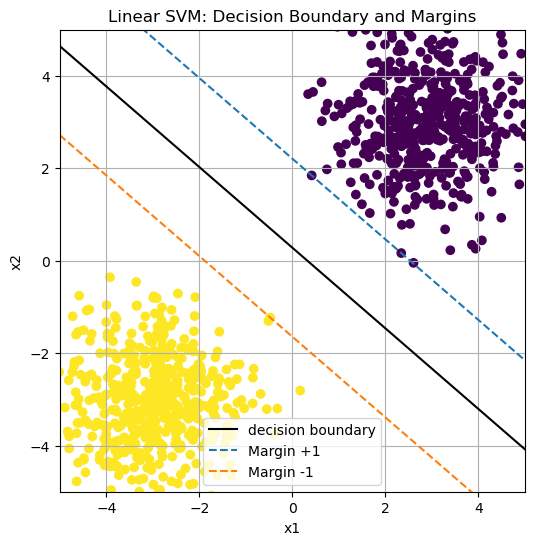

In [2]:
def plot_data_points(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels)

def plot_decision_boundary(w, b):
    x = np.linspace(-5, 5, 100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x, y, 'k' , label='decision boundary')

def plot_margins(w, b):
    x = np.linspace(-5, 5, 100)
    y_plus = -(w[0] * x + b + 1) / w[1]
    y_minus = -(w[0] * x + b - 1) / w[1]
    plt.plot(x, y_plus, '--', label='Margin +1')
    plt.plot(x, y_minus, '--', label='Margin -1')

data = np.load("../data/toy-data.npz")
training_data = data["training_data"]
training_labels = data["training_labels"]

w = np.array([-0.4528, -0.5190])
alpha = 0.1471

plt.figure(figsize=(6, 6))
plot_data_points(training_data, training_labels)
plot_decision_boundary(w, alpha)
plot_margins(w, alpha)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Linear SVM: Decision Boundary and Margins")
plt.grid()
plt.legend(loc="best")
plt.show()


In [3]:
#q3a

random.seed(189)
np.random.seed(189)
mnist_data = np.load("../data/mnist-data.npz")
spam_data = np.load("../data/spam-data.npz")
print("before process")
print("MNIST Training Data Shape:", mnist_data["training_data"].shape)
print("MNIST Training Label Shape:", mnist_data["training_labels"].shape)
print("SPAM Training Data Shape:", spam_data["training_data"].shape)
print("SPAM Training Label Shape:", spam_data["training_labels"].shape) 

def shuffle_partition_MNIST(data):
    training_data = data["training_data"].reshape(-1, 28 * 28)
    training_labels = data["training_labels"].reshape(-1, 1)
    combined_data = np.hstack((training_data, training_labels))

    np.random.shuffle(combined_data)
    validation_data = combined_data[:10000, :-1]  
    validation_labels = combined_data[:10000, -1]  
    training_data = combined_data[10000:, :-1]  
    training_labels = combined_data[10000:, -1]  

    return validation_data, validation_labels, training_data, training_labels

def shuffle_partition_SPAM(data):
    training_data = data["training_data"]
    training_labels = data["training_labels"].reshape(-1, 1)
    combined_data = np.hstack((training_data, training_labels))

    np.random.shuffle(combined_data)
    index = int(0.2 * len(combined_data))
    validation_data = combined_data[:index, :-1]
    validation_labels = combined_data[:index, -1]
    training_data = combined_data[index:, :-1]
    training_labels = combined_data[index:, -1]
    return validation_data, validation_labels, training_data, training_labels

mnist_validation_data, mnist_validation_labels, mnist_training_data, mnist_training_labels = shuffle_partition_MNIST(mnist_data)
spam_validation_data, spam_validation_labels, spam_training_data, spam_training_labels = shuffle_partition_SPAM(spam_data)  
print("after process") 
print("MNIST Training Data Shape:", mnist_training_data.shape)
print("MNIST Validation Data Shape:", mnist_validation_data.shape)
print("SPAM Training Data Shape:", spam_training_data.shape)
print("SPAM Validation Data Shape:", spam_validation_data.shape) 


before process
MNIST Training Data Shape: (60000, 1, 28, 28)
MNIST Training Label Shape: (60000,)
SPAM Training Data Shape: (4171, 32)
SPAM Training Label Shape: (4171,)
after process
MNIST Training Data Shape: (50000, 784)
MNIST Validation Data Shape: (10000, 784)
SPAM Training Data Shape: (3337, 32)
SPAM Validation Data Shape: (834, 32)


In [4]:

#q3b
random.seed(189)
np.random.seed(189)
def accuracy_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct_predictions = (y_true == y_pred)
    accuracy = np.sum(correct_predictions) / len(y_true)
    return accuracy


Training size: 100, Train Accuracy: 1.00000, Validation Accuracy: 0.74470
Training size: 200, Train Accuracy: 1.00000, Validation Accuracy: 0.81440
Training size: 500, Train Accuracy: 1.00000, Validation Accuracy: 0.86430
Training size: 1000, Train Accuracy: 1.00000, Validation Accuracy: 0.88430
Training size: 2000, Train Accuracy: 1.00000, Validation Accuracy: 0.89680
Training size: 5000, Train Accuracy: 1.00000, Validation Accuracy: 0.90010
Training size: 10000, Train Accuracy: 1.00000, Validation Accuracy: 0.90830


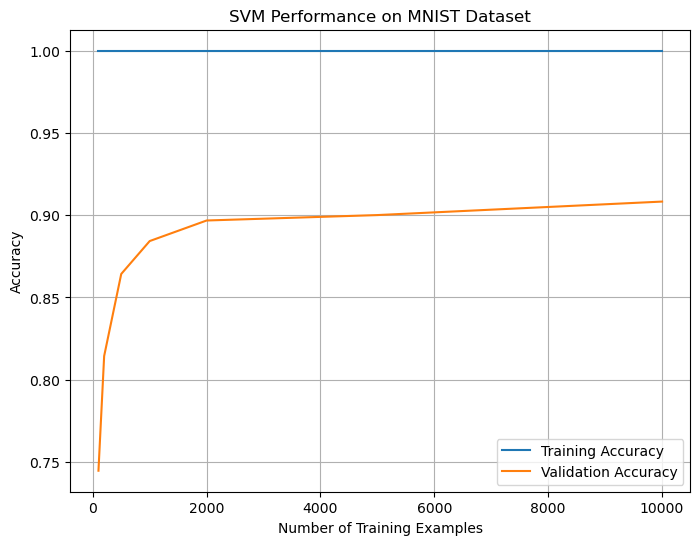

Training size: 100, Train Accuracy: 0.90000, Validation Accuracy: 0.78417
Training size: 200, Train Accuracy: 0.81500, Validation Accuracy: 0.77098
Training size: 500, Train Accuracy: 0.80800, Validation Accuracy: 0.77698
Training size: 1000, Train Accuracy: 0.79600, Validation Accuracy: 0.79257
Training size: 2000, Train Accuracy: 0.80950, Validation Accuracy: 0.79137
Training size: 3337, Train Accuracy: 0.80611, Validation Accuracy: 0.79017


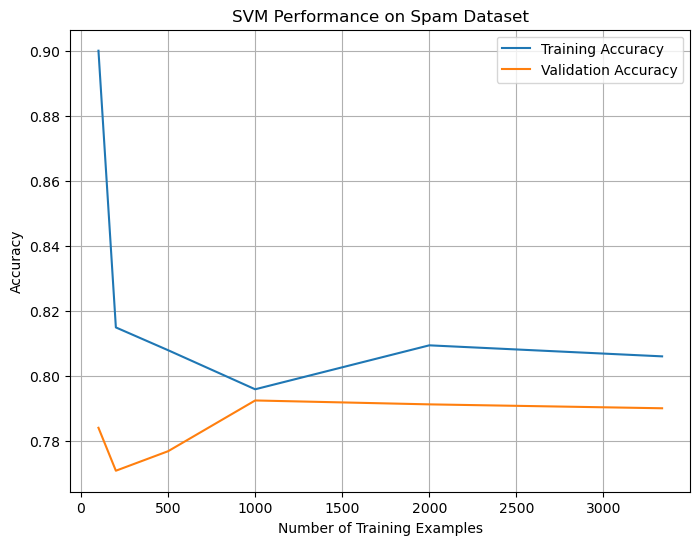

In [5]:
#q4a & q4b
random.seed(189)
np.random.seed(189)
def train_and_evaluate_svm(training_data, training_labels, validation_data, validation_labels, train_sizes, name):
    training_accuracies = []
    validation_accuracies = []
    for size in train_sizes:
        model = SVC(kernel='linear')
        training_data_subset = training_data[:size]
        training_labels_subset = training_labels[:size]

        model.fit(training_data_subset, training_labels_subset)
        train_predictions = model.predict(training_data_subset)
        train_accuracy = accuracy_score(training_labels_subset, train_predictions)
        training_accuracies.append(train_accuracy)

        validation_predictions = model.predict(validation_data)
        validation_accuracy = accuracy_score(validation_labels, validation_predictions)
        validation_accuracies.append(validation_accuracy)
        
        print(f"Training size: {size}, Train Accuracy: {train_accuracy:.5f}, Validation Accuracy: {validation_accuracy:.5f}")

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, training_accuracies, label="Training Accuracy")
    plt.plot(train_sizes, validation_accuracies, label="Validation Accuracy")
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Accuracy")
    plt.title(f"SVM Performance on {name} Dataset")
    plt.legend()
    plt.grid()
    plt.show()
    
train_sizes_mnist = [100, 200, 500, 1000, 2000, 5000, 10000]
train_and_evaluate_svm(mnist_training_data, mnist_training_labels,mnist_validation_data, mnist_validation_labels,train_sizes_mnist, "MNIST")
train_sizes_spam = [100, 200, 500, 1000, 2000, len(spam_training_data)]
train_and_evaluate_svm(spam_training_data, spam_training_labels,spam_validation_data, spam_validation_labels,train_sizes_spam, "Spam")

In [6]:
#Q5
random.seed(189)
np.random.seed(189)
mnist_data = np.load("../data/mnist-data.npz")
def q5_shuffle_partition_MNIST(data):
    training_data = data["training_data"].reshape(-1, 28 * 28)
    training_labels = data["training_labels"].reshape(-1, 1)
    combined_data = np.hstack((training_data, training_labels))

    np.random.shuffle(combined_data)
    index = int(0.2 * len(combined_data))
    validation_data = combined_data[:index, :-1]
    validation_labels = combined_data[:index, -1]
    training_data = combined_data[index:, :-1]
    training_labels = combined_data[index:, -1]

    return validation_data, validation_labels, training_data, training_labels

mnist_validation_data, mnist_validation_labels, mnist_training_data, mnist_training_labels = q5_shuffle_partition_MNIST(mnist_data)


C_values = [0.00000001, 0.0000001, 0.0000005, 0.000001, 0.0001, 0.01, 0.1, 1]

validation_accuracies = []
training_accuracies = []

training_data = mnist_training_data[:10000]
training_labels = mnist_training_labels[:10000]

for c in C_values:
    model = SVC(kernel='linear', C=c)
    model.fit(training_data, training_labels)
    train_pred = model.predict(training_data)
    train_acc = accuracy_score(training_labels, train_pred)
    training_accuracies.append(train_acc)
    
    validation_predictions = model.predict(mnist_validation_data)
    validation_accuracy = accuracy_score(mnist_validation_labels, validation_predictions)
    validation_accuracies.append(validation_accuracy)

        
    print(f"C: {c}, Training Accuracy: {train_acc:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

best_C = C_values[np.argmax(validation_accuracies)]
best_val_accuracy = max(validation_accuracies)

print(f"Best C: {best_C}, Best Validation Accuracy: {best_val_accuracy:.4f}")


C: 1e-08, Training Accuracy: 0.8992, Validation Accuracy: 0.8940
C: 1e-07, Training Accuracy: 0.9353, Validation Accuracy: 0.9234
C: 5e-07, Training Accuracy: 0.9551, Validation Accuracy: 0.9300
C: 1e-06, Training Accuracy: 0.9654, Validation Accuracy: 0.9284
C: 0.0001, Training Accuracy: 1.0000, Validation Accuracy: 0.9068
C: 0.01, Training Accuracy: 1.0000, Validation Accuracy: 0.9067
C: 0.1, Training Accuracy: 1.0000, Validation Accuracy: 0.9067
C: 1, Training Accuracy: 1.0000, Validation Accuracy: 0.9067
Best C: 5e-07, Best Validation Accuracy: 0.9300


In [7]:
#q6
random.seed(189)
np.random.seed(189)
spam_data = np.load("../data/spam-data.npz")
training_data = spam_data["training_data"]
training_labels = spam_data["training_labels"].reshape(-1, 1)
combined_data = np.hstack((training_data, training_labels))

def k_fold_cross_validation(data, labels, k, C_values):
    fold_size = len(data) // k
    accuracies = {c: [] for c in C_values}

    for c in C_values:
        np.random.shuffle(combined_data)
        data = combined_data[:, :-1]
        labels = combined_data[:, -1]

        for fold in range(k):
            val_start = fold * fold_size
            val_end = (fold + 1) * fold_size if fold != k - 1 else len(data)
            validation_data = data[val_start:val_end]
            validation_labels = labels[val_start:val_end]
            training_data = np.concatenate((data[:val_start], data[val_end:]), axis=0)
            training_labels = np.concatenate((labels[:val_start], labels[val_end:]), axis=0)

            model = SVC(kernel='linear', C=c)
            model.fit(training_data, training_labels)

            predictions = model.predict(validation_data)
            accuracy = np.mean(predictions == validation_labels)
            accuracies[c].append(accuracy)

    average_accuracies = {c: np.mean(accuracies[c]) for c in C_values}
    best_C = max(average_accuracies, key=average_accuracies.get)
    best_accuracy = average_accuracies[best_C]

    print("Cross-Validation Results:")
    for c, avg_acc in average_accuracies.items():
        print(f"C: {c}, Average Validation Accuracy: {avg_acc:.5f}")
    print(f"Best C: {best_C}, Best Average Validation Accuracy: {best_accuracy:.5f}")

    return best_C, average_accuracies

C_values = [1e-3, 0.01, 0.1, 1, 5, 10, 50, 100]
k = 5
best_C, accuracies = k_fold_cross_validation(spam_training_data, spam_training_labels.flatten(), k, C_values)


Cross-Validation Results:
C: 0.001, Average Validation Accuracy: 0.74343
C: 0.01, Average Validation Accuracy: 0.77005
C: 0.1, Average Validation Accuracy: 0.79133
C: 1, Average Validation Accuracy: 0.80056
C: 5, Average Validation Accuracy: 0.79856
C: 10, Average Validation Accuracy: 0.80429
C: 50, Average Validation Accuracy: 0.80086
C: 100, Average Validation Accuracy: 0.80016
Best C: 10, Best Average Validation Accuracy: 0.80429


In [8]:
import pandas as pd
def results_to_csv(y_test, file_name):
    y_test = y_test.astype(int)  
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  
    df.to_csv(file_name, index_label='Id')

In [9]:
%run featurize.py

In [10]:
#Q7 MNIST
random.seed(189)
np.random.seed(189)
mnist_data = np.load("../data/mnist-data.npz")

training_data, training_labels = mnist_data["training_data"].reshape(-1, 28 * 28), mnist_data["training_labels"]
test_data = mnist_data["test_data"].reshape(-1, 28 * 28)

final_model = SVC(kernel='linear', C=5e-07)
final_model.fit(training_data, training_labels)
mnist_test_predictions = final_model.predict(test_data)

results_to_csv(mnist_test_predictions, "mnist_submission.csv")

In [11]:
#Q7 SPAM find best C
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

random.seed(189)
np.random.seed(189)

spam_data = np.load("../data/q7-spam-data.npz")
training_data = spam_data["training_data"]
training_labels = spam_data["training_labels"]

X_train, X_val, y_train, y_val = train_test_split(
    training_data, training_labels, test_size=0.2, random_state=42
)

C_values = [10, 50, 100]

accuracies = {}

for c in C_values:
    model = SVC(kernel='linear', C=c)
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies[c] = accuracy
    print(f"Validation Accuracy for C = {c}: {accuracy:.5f}")

best_C = max(accuracies, key=accuracies.get)
print(f"\nBest C: {best_C}, Best Validation Accuracy: {accuracies[best_C]:.5f}")


Validation Accuracy for C = 10: 0.84910
Validation Accuracy for C = 50: 0.85030
Validation Accuracy for C = 100: 0.84910

Best C: 50, Best Validation Accuracy: 0.85030


In [12]:
#Q7 SPAM
random.seed(189)
np.random.seed(189)
spam_data = np.load("../data/q7-spam-data.npz")

spam_training_data, spam_training_labels = spam_data["training_data"], spam_data["training_labels"]
spam_test_data = spam_data["test_data"]

spam_final_model = SVC(kernel='linear', C=50)
spam_final_model.fit(spam_training_data, spam_training_labels)
spam_test_predictions = spam_final_model.predict(spam_test_data)

results_to_csv(spam_test_predictions, "q7_spam_sub.csv")